# 1.0 IMPORTS

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
import matplotlib.pyplot as plt
import random

## 1.1 Load dataset

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
df.head()

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,limite_adicional
0,1767,21,278.172008,2577.05,24196.89636,104.306544,31.038763,6,5,7,21,14,9,15,Não,Não,Negar
1,11920,40,268.874152,2465.39,19227.37796,69.858778,36.917093,5,8,5,40,23,10,18,Não,Não,Negar
2,8910,36,446.643127,1055.29,42822.28223,134.201478,34.561714,0,3,6,26,13,3,15,Sim,Não,Negar
3,4964,58,321.141267,703.05,51786.82600,297.350067,31.493561,0,3,7,12,7,2,1,Sim,Não,Negar
4,10100,35,428.716114,891.29,44626.85346,134.201478,28.028887,2,8,7,24,10,8,20,Sim,Não,Negar


In [4]:
df.loc[:, 'limite_adicional'].unique()

array(['Negar', 'Conceder'], dtype=object)

In [5]:
df.columns

Index(['id_cliente', 'idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros',
       'investe_exterior', 'pessoa_polit_exp', 'limite_adicional'],
      dtype='object')

# 2.0 SELEÇÃO DE FEATURES

In [6]:
# x = features_treinamento
# y = label

features = ['idade', 'saldo_atual', 'divida_atual', 'renda_anual',
           'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
           'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
           'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']
label = 'limite_adicional'

x_train = df.loc[:, features]
y_train = df.loc[:, label]

# 3.0 TREINAMENTO

In [7]:
#definção de parametros do treinamento

k = 7 #número de vizinhos - aleatório
knn_classifier = KNeighborsClassifier(n_neighbors = k)

#treinamento do algoritmo
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [8]:
y_pred = knn_classifier.predict(x_train)

In [9]:
df_result = df.copy()

In [10]:
df_result['classificacao'] = y_pred

In [11]:
df_result.loc[:, ['id_cliente', 'idade', 'limite_adicional', 'classificacao']].sample(10)

,id_cliente,idade,limite_adicional,classificacao
3260,6189,42,Negar,Negar
3917,5864,34,Negar,Negar
3081,10237,46,Negar,Negar
6863,10947,47,Negar,Negar
5214,2868,30,Negar,Negar
2024,9064,45,Negar,Negar
1446,8614,18,Negar,Negar
9091,6556,48,Negar,Negar
7015,554,61,Negar,Negar
4443,11319,35,Negar,Negar


# 4.0 PERFORMANCE

In [12]:
df.loc[:, 'limite_adicional'].value_counts(normalize=True)

Negar       0.841579
Conceder    0.158421
Name: limite_adicional, dtype: float64

## 4.1 Acurácia Manual

In [13]:
df_result['acertos'] = (df_result.loc[:, ['id_cliente', 'limite_adicional', 'classificacao']]
                        .apply( lambda x: 1 if x['limite_adicional'] == x['classificacao'] else 0, axis=1))

In [14]:
acuracia = df_result['acertos'].value_counts(normalize=True)
# 0 - errou
# 1 - acertou

print ('Acurácia: {}%'.format(acuracia[1]))

Acurácia: 0.8590526315789474%


## 4.2 Matriz de Confusão

In [15]:
mt.confusion_matrix (y_train, y_pred)

array([[ 369, 1136],
       [ 203, 7792]], dtype=int64)

## 4.3 Acurácia Sklearn

In [16]:
mt.accuracy_score(y_train, y_pred)

0.8590526315789474

## 4.4 Precision

In [17]:
mt.precision_score(y_train, y_pred, pos_label='Conceder')

0.6451048951048951

## 4.5 Recall

In [18]:
mt.recall_score(y_train, y_pred, pos_label='Conceder')

0.24518272425249169

# 5.0 EXERCICIOS

In [42]:
def metricas (df, qtd_k):
    x_train = df.loc[:, features]
    y_train = df.loc[:, label]
    
    knn_classifier = KNeighborsClassifier(n_neighbors=qtd_k)
    knn_classifier.fit(x_train, y_train)

    y_pred = knn_classifier.predict(x_train)
        
    matriz_confusao = mt.confusion_matrix (y_train, y_pred)
    acuracia = mt.accuracy_score(y_train, y_pred)
    precisao = mt.precision_score(y_train, y_pred, pos_label='Conceder')
    recall = mt.recall_score(y_train, y_pred, pos_label='Conceder')
    return matriz_confusao, acuracia, precisao, recall
    
def desbalancear (df, valor):
    df_aux = df.copy()

    # Determinando o número total de linhas
    total_linhas = df_aux.shape[0]

    # Calculando o número de linhas para "Conceder" e "Negar"
    linhas_conceder = int(valor * total_linhas)
    linhas_negar = total_linhas - linhas_conceder


    df_aux['limite_adicional'] = 'Conceder'
    deny_indices = random.sample(range(total_linhas), linhas_negar)
    df_aux.loc[deny_indices, 'limite_adicional'] = 'Negar'
    
    return df_aux

## 1.0  Retreino o algoritmo com os seguintes valores para K: [3, 5, 7, 9, 11, 13, 15, 17, 19 e 21] e anote a acurácia

In [20]:
range_k = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

for i in range_k:
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(x_train, y_train)

    y_pred = knn_classifier.predict(x_train)

    acuracia = mt.accuracy_score(y_train, y_pred)
    print ('Com o valor de k em {}, a acurácia foi de {}'.format(i, acuracia))


Com o valor de k em 3, a acurácia foi de 0.8854736842105263
Com o valor de k em 5, a acurácia foi de 0.8667368421052631
Com o valor de k em 7, a acurácia foi de 0.8590526315789474
Com o valor de k em 9, a acurácia foi de 0.8528421052631578
Com o valor de k em 11, a acurácia foi de 0.85
Com o valor de k em 13, a acurácia foi de 0.8492631578947368
Com o valor de k em 15, a acurácia foi de 0.848
Com o valor de k em 17, a acurácia foi de 0.8478947368421053
Com o valor de k em 19, a acurácia foi de 0.8478947368421053
Com o valor de k em 21, a acurácia foi de 0.8462105263157895


## 2.0 Qual o problema principal de usar a métrica acurácia? Escreve um exemplo hipotético, no qual o problema acontece.


Em dado desbalanceados pois vai dar que a performace do algoritmo é boa, mas na realidade não é. O resultado vai ser em base da classe marjoritária.

Exemplo: se uma população tem 10% de pessoas com doença, usarmos um algoritmo para classificar a população que não está doente (90% acurácia) e o modelo errar a classificação deles, teremos uma falsa sensação de que o modelo performou bem.

## 3.0 Explique com um pequeno texto ilustrando a diferença entre a métrica de Precision e Recall e mostrando quando usada deve ser escolhida em relação a outra

Precision é quando precisamos saber que de todas as classificações que foram feitas estão certas. Eram 50 situações ( 25 situações boas ) > classificou 30 > 20 boas > teve acerto 20/30 .

Recall é quanto de todas as situações ele acertou. Era 50 situações ( 25 situações boas ) > classificou 30 > 20 boas > teve acerto 20/25

## 4.0 Escreve um trecho de código que automatize o treinamento do algoritmo K-NN, a fim de encontrar o melhor valor para K, do exercício 1.

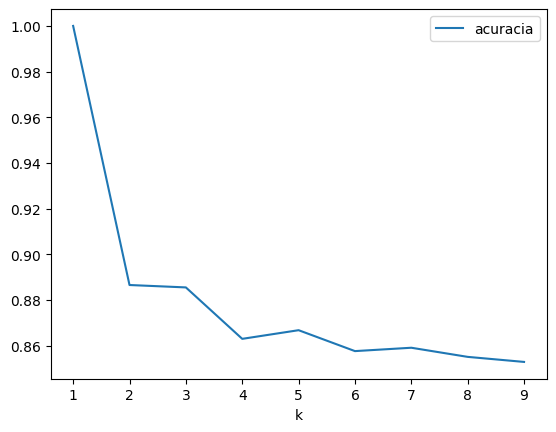

In [21]:
def valor_acuracia(qtd_k):
    knn_classifier = KNeighborsClassifier(n_neighbors=qtd_k)
    knn_classifier.fit(x_train, y_train)

    y_pred = knn_classifier.predict(x_train)

    return mt.accuracy_score(y_train, y_pred)

df_aux = pd.DataFrame(columns=['k', 'acuracia'])

for i in range(1, 10):
    df_aux.loc[len(df_aux)] = [i, valor_acuracia(i)]

df_aux['K'] = df_aux['k'].astype(int)

df_aux.plot ('k', 'acuracia')

plt.show()

## 5.0 Escreva um pequeno texto, explicando as 6 denominações da matriz de confusão: P, N, TP, FN, FP e TN

P - classe positivas

N - classe negativa

TP - classe positiva acertada (era positiva e classificou como positiva)

FN - classe positiva errada (era positiva e classificou como negativa)

FP - classe negativa errada ( era negativa e classificou como positiva)

TN - classe negativa acertada (era negativa e classificou como negativa)

## 6.0 No conjunto de dados usado na aula 12: “K-Nearest Neighbors - Prática”, existe alguma variável que fere as premissas do K-NN? Se sim ou não, explique.

Todas as variáveis categóricas ferem as premissas do K-NN, pois para o modelo conseguir comparar a similaridade os valores precisam ser numéricos.

## 7.0 Faça a seguinte bateria de testes



### 7.1 Class balanceada originalmente 
#### 1 Faça a matriz de confusão, calcule a acurácia, recall e precision do conjunto de dados original
#### 2 Anote os resultados

In [43]:
df_original = ()
df_original = metricas(df, 7)

In [44]:
df_original

(array([[ 369, 1136],
        [ 203, 7792]], dtype=int64),
 0.8590526315789474,
 0.6451048951048951,
 0.24518272425249169)

### 7.2 Classe balanceada
#### 1. Mantenha a proporção de 50% das linhas da planilha de dados com exemplos da classe “Conceder” e 50% com a classe “Negar”.
#### 2. Faça a matriz de confusão, calcule a acurácia, recall e precision.
#### Anote o resultado

In [46]:
df_50 = desbalancear(df, 0.5)
df_50.loc[:, 'limite_adicional'].value_counts(normalize=True)

Conceder    0.5
Negar       0.5
Name: limite_adicional, dtype: float64

In [47]:
metricas_50 = metricas(df_50, 7)
metricas_50

(array([[3106, 1644],
        [1623, 3127]], dtype=int64),
 0.6561052631578947,
 0.6567984774793826,
 0.6538947368421053)

### 7.3 Classe desbalanceada 90/10
#### 1. Mantenha a proporção de 90% das linhas da planilha de dados com exemplos da classe “Conceder” e 10% com a classe “Negar”.
#### 2. Faça a matriz de confusão, calcule a acurácia, recall e precision.
#### 3. Anote os resultados.

In [35]:
df_90 = desbalancear(df, 0.9)
df_90.loc[:, 'limite_adicional'].value_counts(normalize=True)

Conceder    0.9
Negar       0.1
Name: limite_adicional, dtype: float64

In [36]:
metricas_90 = metricas(df_90)
metricas_90

(array([[8464,   86],
        [ 788,  162]], dtype=int64),
 0.908,
 0.9148292261132728,
 0.9899415204678362)

### 7.4  Refaça o exercícios 7.3 com as seguintes variações: 80/20, 70/30 e 60/40

In [39]:
#80/20
df_80 = desbalancear(df, 0.8)
metricas_80 = metricas(df_80, 7)

#70/30
df_70 = desbalancear(df, 0.7)
metricas_70 = metricas(df_70, 7)

#60/40
df_60 = desbalancear(df, 0.6)
metricas_60 = metricas(df_60, 7)
    

###  7.5 Crie um tabela de comparação entre os resultados das 3 métricas (acurácia, recall e precision ) para cada uma das proporções ( 50/50, 90/10, 80/20, 70/30, 60/40 ) e responda as seguintes perguntas:

In [38]:
from tabulate import tabulate

data = {
    'Métricas': ['Acurácia', 'Precision', 'Recall'],
    'Original': df_original[1:],
    '50/50': metricas_50[1:],
    '60/40': metricas_60[1:],
    '70/30': metricas_70[1:],
    '80/20': metricas_80[1:],
    '90/10': metricas_90[1:],
}

table = tabulate(data, headers='keys', tablefmt='fancy_grid')

print(table)

╒════════════╤════════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│ Métricas   │   Original │    50/50 │    60/40 │    70/30 │    80/20 │    90/10 │
╞════════════╪════════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ Acurácia   │   0.885474 │ 0.757684 │ 0.760737 │ 0.795263 │ 0.838947 │ 0.908    │
├────────────┼────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ Precision  │   0.70997  │ 0.759542 │ 0.780672 │ 0.818465 │ 0.857479 │ 0.914829 │
├────────────┼────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ Recall     │   0.468439 │ 0.754105 │ 0.83614  │ 0.909173 │ 0.957895 │ 0.989942 │
╘════════════╧════════════╧══════════╧══════════╧══════════╧══════════╧══════════╛


#### 1. Como a métrica da acurácia se comporta com a variação do desbalanceamento do conjunto de dados?
A acurácia tende a aumentar conforme a classe marjoritária fica maior, pois se classe minoritária for rara, o modelo simplesmente preve a classe marjoritária para todos os exemplos. Mas não quer dizer que o modelo está perfomando bem.
#### 2. O que acontece com a métrica “Precison” e “Recall” a medida que os conjunto de dados tendem ao balanceamento de 50/50?
Quando os dados estão balanceado, o modelo tem uma chance igual para aprender e conseguir distinguir corretamente as classes. Então se o os dados estão 50/50, tanto a métrica de Recall e Precision tem potencial de melhorar.
#### 3. Observando as respostas anteriores, quais são as ações que aumentam ou diminuem a métrica de “Precision” ou “Recall” de um problema de negócio?
O desbalanceamento pode afetar muito Precision e Recall para classe minoritária. Podemos ajustar o Hiperparametro

In [55]:
def tabela_comparacao(df, qtd_k):
    #original
    df_original = ()
    df_original = metricas(df, qtd_k)

    #50/50
    df_50 = desbalancear(df, 0.5)
    metricas_50 = metricas(df_50, qtd_k)

    #90/10
    df_90 = desbalancear(df, 0.1)
    metricas_90 = metricas(df_90, qtd_k)

    #80/20
    df_80 = desbalancear(df, 0.8)
    metricas_80 = metricas(df_80, qtd_k)

    #70/30
    df_70 = desbalancear(df, 0.7)
    metricas_70 = metricas(df_70, qtd_k)

    #60/40
    df_60 = desbalancear(df, 0.6)
    metricas_60 = metricas(df_60, qtd_k)
    
    data = {
    'Métricas': ['Acurácia', 'Precision', 'Recall'],
    'Original': df_original[1:],
    '50/50': metricas_50[1:],
    '60/40': metricas_60[1:],
    '70/30': metricas_70[1:],
    '80/20': metricas_80[1:],
    '90/10': metricas_90[1:],
    }

    table = tabulate(data, headers='keys', tablefmt='fancy_grid')

    return table
    

In [57]:
vizinhos_2 = tabela_comparacao(df, 2)
print(vizinhos_2)

╒════════════╤════════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│ Métricas   │   Original │    50/50 │    60/40 │    70/30 │    80/20 │    90/10 │
╞════════════╪════════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ Acurácia   │   0.886526 │ 0.755263 │ 0.758316 │ 0.791263 │ 0.843368 │ 0.912421 │
├────────────┼────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ Precision  │   0.582656 │ 0.671378 │ 0.712856 │ 0.7703   │ 0.836268 │ 0.533109 │
├────────────┼────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ Recall     │   1        │ 1        │ 1        │ 1        │ 1        │ 1        │
╘════════════╧════════════╧══════════╧══════════╧══════════╧══════════╧══════════╛


In [58]:
vizinhos_3 = tabela_comparacao(df, 3)
print(vizinhos_3)

╒════════════╤════════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│ Métricas   │   Original │    50/50 │    60/40 │    70/30 │    80/20 │    90/10 │
╞════════════╪════════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ Acurácia   │   0.885474 │ 0.752105 │ 0.764105 │ 0.795789 │ 0.842211 │ 0.907263 │
├────────────┼────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ Precision  │   0.70997  │ 0.750996 │ 0.781082 │ 0.818674 │ 0.860281 │ 0.633205 │
├────────────┼────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ Recall     │   0.468439 │ 0.754316 │ 0.843158 │ 0.909774 │ 0.958421 │ 0.172632 │
╘════════════╧════════════╧══════════╧══════════╧══════════╧══════════╧══════════╛


In [59]:
vizinhos_1 = tabela_comparacao(df, 1)
print(vizinhos_1)

╒════════════╤════════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ Métricas   │   Original │   50/50 │   60/40 │   70/30 │   80/20 │   90/10 │
╞════════════╪════════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ Acurácia   │          1 │       1 │       1 │       1 │       1 │       1 │
├────────────┼────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Precision  │          1 │       1 │       1 │       1 │       1 │       1 │
├────────────┼────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Recall     │          1 │       1 │       1 │       1 │       1 │       1 │
╘════════════╧════════════╧═════════╧═════════╧═════════╧═════════╧═════════╛


In [60]:
vizinhos_4 = tabela_comparacao(df, 4)
print(vizinhos_4)

╒════════════╤════════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│ Métricas   │   Original │    50/50 │    60/40 │    70/30 │    80/20 │    90/10 │
╞════════════╪════════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ Acurácia   │   0.862947 │ 0.676842 │ 0.703368 │ 0.746211 │ 0.816632 │ 0.901684 │
├────────────┼────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ Precision  │   0.563877 │ 0.627196 │ 0.685361 │ 0.74309  │ 0.816786 │ 0.514925 │
├────────────┼────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ Recall     │   0.595349 │ 0.872    │ 0.934737 │ 0.974286 │ 0.993684 │ 0.290526 │
╘════════════╧════════════╧══════════╧══════════╧══════════╧══════════╧══════════╛
